Kickstarter Is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity The company's stated mission is to "help bring creative projects to life". Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.


I will try to answer this questions that given to me:

1)Model the success and failure of projects published on Kickstarter to reach the targeted fund (investment).

2)Which factors affect investment success?






Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import warnings
from collections import Counter

In [3]:
df = pd.read_csv(r"C:\Users\simay\Desktop\ks-projects-201801.csv")
df#lets look first five observations in our data.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [4]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col,":",df[col].nunique()) #shows in each categoric columns in the number of  unique values .

ID : 378661
name : 375764
category : 159
main_category : 15
currency : 14
deadline : 3164
goal : 8353
launched : 378089
pledged : 62130
state : 6
backers : 3963
country : 23
usd pledged : 95455
usd_pledged_real : 106065
usd_goal_real : 50339


 shows in each categoric columns in the number of  unique values 
 .

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 19 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
days                378661 non-null int64
launch_year         378661 non-null int64
success             378661 non-null int32
duration            378661 non-null float64
dtypes: float64(6), int32(1), int64(4), object(8)
memory usage: 53.4+ M

data has 15 columns and 378661 observtaion.

In [62]:
#look at null values
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
days                   0
launch_year            0
success                0
duration               0
dtype: int64

The most non Value is observed usd_pedgged

In [63]:
df['deadline']=pd.to_datetime(df['deadline'], format="%Y/%m/%d").dt.date
df['launched']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.date
df['days'] = (df['deadline'] - df['launched']).dt.days
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year

In [9]:
df.head(50)#now it seems more normal.

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days,launch_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.00,failed,0,GB,0.00,0.00,1533.95,59,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,15,US,100.00,2421.00,30000.00,60,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3,US,220.00,220.00,45000.00,45,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1,US,1.00,1.00,5000.00,30,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14,US,1283.00,1283.00,19500.00,56,2015
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224,US,52375.00,52375.00,50000.00,35,2016
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16,US,1205.00,1205.00,1000.00,20,2014
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.00,failed,40,US,453.00,453.00,25000.00,45,2016
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,canceled,58,US,8233.00,8233.00,125000.00,35,2014
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43,US,6240.57,6240.57,65000.00,30,2014


In [10]:
df.corr() #to see correlations

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,days,launch_year
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854,-0.001131,-0.000574
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692,0.004321,0.015712
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024,0.000847,0.029424
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517,-0.000792,0.016333
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172,0.000771,-0.006964
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596,0.000946,0.021875
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000,0.004184,0.012274
days,-0.001131,0.004321,0.000847,-0.000792,0.000771,0.000946,0.004184,1.000000,-0.127719
launch_year,-0.000574,0.015712,0.029424,0.016333,-0.006964,0.021875,0.012274,-0.127719,1.000000


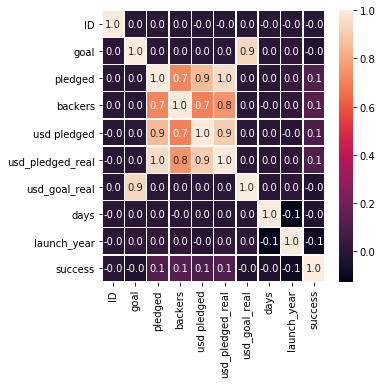

In [27]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,linewidth=.4,fmt='.1f',ax=ax)
plt.show()

There is a strong positive relationship between Usd_pledged_real and usd_pleged.
There is a strong positive relation beetween usd_pledged and usd_pledged_real.

In [64]:
df.category.value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [29]:
df.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [12]:
print(len(df.category.unique()))
print(len(df.main_category.unique()))

159
15


Ctargory uniue values result that is 159.
main_category unique values result is 15.

I will start looking the state column distribuition that might will be our key to understand this dataset

In [13]:
state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['purple']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


Only 35,4% of all projects got sucess.
More than 60% have failed or canceled;

I can say that the most important category's here is failed and canceled;

Maybe we can build an model to predict if a project would obtain the money or not;


Looking at the features here I am thinking of dropping the following:

THe reason is:

**goal** as it is in local currency, and it would be easier to work with usd_goal_real
**currency** as we will just use the information that is already converted to USD.

**usd pledged:** it has missing values, it is kickstarter information given about pledge amount in USD but this is already included in usd_pledged_real.

**pledged:**  is funding raised in local currency, see explanation above.

**category:**  main_category retains a lot of information, and will still increase our number of features quite significantly when one hot encoded. If we were to try to one hot encode category the dimensionality of our data would be very high.

**ID:** all of the ID fields are unique, and it will not give us any information about project success.

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

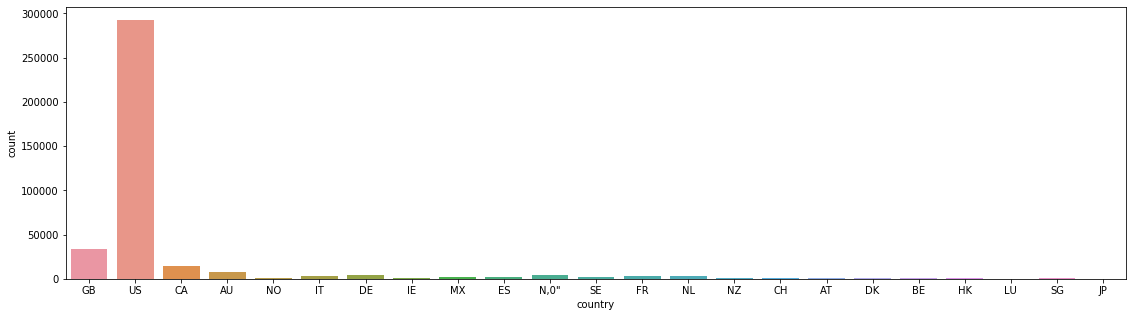

In [14]:
plt.subplots(figsize=(19,5))
sns.countplot(x="country",data=df)
df.country.value_counts()
df.country.unique()

In [15]:

#N,0" engineering to 'NO'
df.country = df.country.replace(to_replace='N,0"', value='NO')
df.country.value_counts()
df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

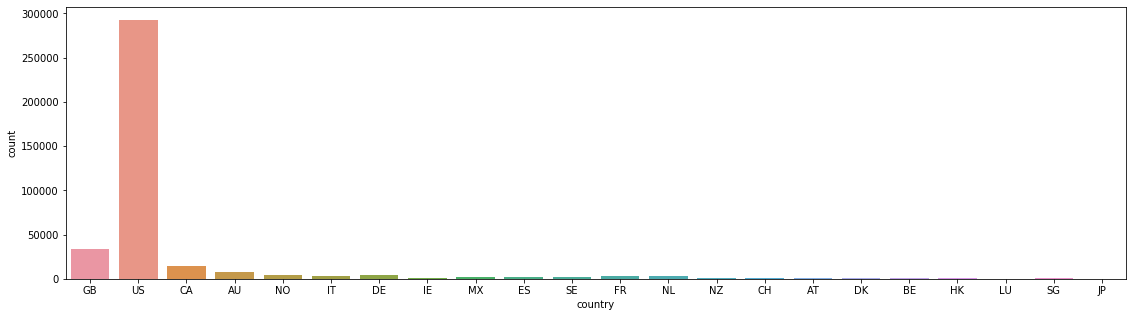

In [16]:
plt.subplots(figsize=(19,5))
sns.countplot(x="country",data=df)
df.country.value_counts()
df.country.unique()

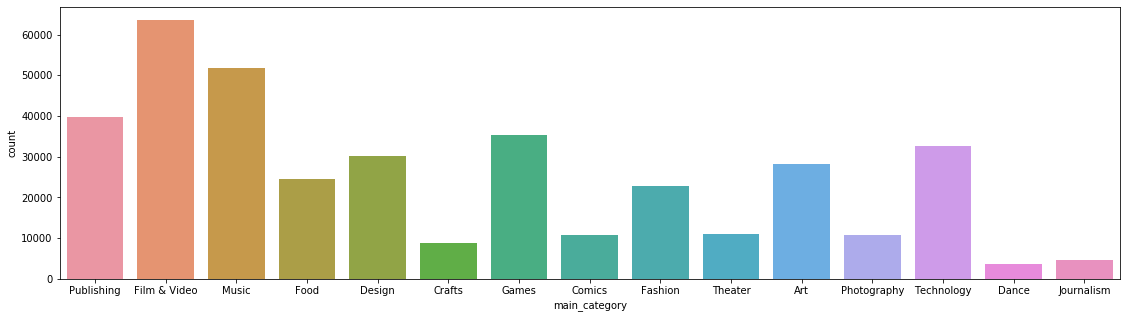

In [17]:
#Plotting the Main_category Distrubation


plt.subplots(figsize=(19,5))
sns.countplot(x="main_category",data=df)

I assume that in the country variable the value N,0" is an error, and T am rewriting that as NO.

 I am defining success by a project raising at least as much as their goal had stipulated. This is also how Kickstarter defines success.

In [18]:
#engineer a 'success' variable
df['success'] = (df.usd_goal_real <= df.usd_pledged_real)*1
df.success.describe()

count    378661.000000
mean          0.361912
std           0.480554
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

I will also engineer a duration feature to see if the timeline of a project influences the chances at success. The dataset contains information about the date and time a project was launched, and what the fundraising deadline was. From this it is straightforward to calculate how many hours the fundraising was supposed to last.



In [36]:
#df.launched = pd.to_datetime(df.launched)

df["launched"].head()

0    2015-08-11
1    2017-09-02
2    2013-01-12
3    2012-03-17
4    2015-07-04
Name: launched, dtype: object

**one hot encode the categorical variables**: main_category and coutnry. This means that each state in each feature will be represented as a binary state. For example if a project originated in the U.S. that will be denoted as a value of 1 in the dataset, and all other countries will have a value of 0 for that project. This will make it easier for any models we deal by quantifying non-numerical values.

In [19]:
df['duration'] = (df.deadline - df.launched).astype('timedelta64[h]')

df.head() #we add new column project duration.Later ı will drop deadline anfd launched column.

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days,launch_year,success,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95,59,2015,0,1416.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00,60,2017,0,1440.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00,45,2013,0,1080.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00,30,2012,0,720.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56,2015,0,1344.0


In [26]:
types=["object"]
catagory=list(df.select_dtypes(include=types))
dt=df[catagory]
dt.head() #ßhows categorical data

,name,category,main_category,currency,deadline,launched,state,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04,canceled,US


Shows only categorical datas in data set.

In [39]:
#ı dont want to use one of them ,some of them ı will do one hot encoding
dfEncod= pd.get_dummies(df.drop(labels=['name', 'launched', 'deadline', 'state',
                                            'category', 'currency', 'usd pledged', 'pledged',
                                            'ID', 'goal'], axis=1), 
                            columns=['main_category', 'country'])
dfEncod.head()

,backers,usd_pledged_real,usd_goal_real,days,launch_year,success,duration,main_category_Art,main_category_Comics,main_category_Crafts,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0.0,1533.95,59,2015,0,1416.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,2421.0,30000.00,60,2017,0,1440.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,220.0,45000.00,45,2013,0,1080.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,5000.00,30,2012,0,720.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,1283.0,19500.00,56,2015,0,1344.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
main_cats = df["main_category"].value_counts()
main_cats_failed = df[df["state"] == "failed"]["main_category"].value_counts()
main_cats_sucess = df[df["state"] == "successful"]["main_category"].value_counts()
print(main_cats_failed)


Film & Video    32904
Publishing      23145
Music           21752
Technology      20616
Games           16003
Food            15969
Design          14814
Fashion         14182
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3137
Dance            1235
Name: main_category, dtype: int64


In [29]:
print(main_cats_sucess)

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64


I dropped "name', 'launched', 'deadline', 'state',  'category', 'currency', 'usd pledged', 'pledged', 'ID', 'goal' from my data .


In [41]:
def percent_plot(data, title):
    '''
    INPUT: data- data of which to graph distribution
            title- graph title
    OUTPUT: Distribution of Data by Percentage Points
    '''
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();


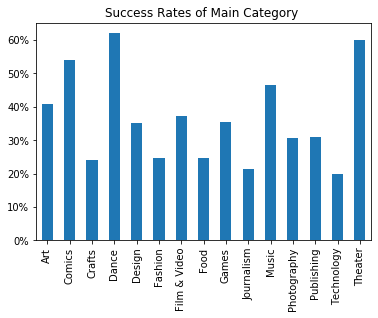

In [31]:
import seaborn as sns

percent_plot((main_cats_sucess/
              main_cats*100), 
             "Success Rates of Main Category ")

 failed and succesful projects have different frequencies

In [32]:
#First plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Failed Categories"
)
#Second plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Success Categories"
)
#Third plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="Categories Distribuition"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True,
                     title="Main Category's Distribuition",
                     bargap=0.05)
iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



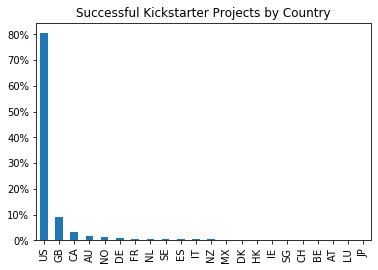

In [33]:
#successful projects by country`
percent_plot((df[df.usd_pledged_real>=df.usd_goal_real].country.value_counts()/
              df[df.usd_pledged_real>=df.usd_goal_real].shape[0]*100), 
             "Successful Kickstarter Projects by Country")

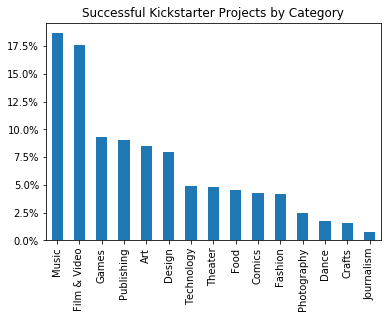

In [34]:
#categories of successful projects
percent_plot((df[df.usd_pledged_real>=df.usd_goal_real].main_category.value_counts()/
              df[df.usd_pledged_real>=df.usd_goal_real].shape[0]*100), 
             "Successful Kickstarter Projects by Category")#succesfull count /total success

In [42]:
def corr_plot(features, fig_size):
    '''
    INPUT: features- which columns of df_encoded to calculate correlation
            fig_size- size of the correlation heatmap for ease of reading
    OUTPUT: Seaborn Heatmap of Correlations
    '''
    corr=dfEncod[features].corr()
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True,ax=ax, linewidths=0.4,fmt=".1f");
    plt.show()

In [43]:
#add a variable that shows average pledge for each project
dfEncod['average_pledge'] = (dfEncod['usd_pledged_real']/(dfEncod['backers']+1))#some bakers include 0 can not divide for this reason we add 1 
dfEncod.drop(["usd_pledged_real","backers"], axis = 1, inplace = True)

dfEncod.head(10)

,usd_goal_real,days,launch_year,success,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,average_pledge
0,1533.95,59,2015,0,1416.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,30000.00,60,2017,0,1440.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,151.312500
2,45000.00,45,2013,0,1080.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55.000000
3,5000.00,30,2012,0,720.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.500000
4,19500.00,56,2015,0,1344.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,85.533333
5,50000.00,35,2016,1,840.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,232.777778
6,1000.00,20,2014,1,480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,70.882353
7,25000.00,45,2016,0,1080.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,11.048780
8,125000.00,35,2014,0,840.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,139.542373
9,65000.00,30,2014,0,720.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,141.831136


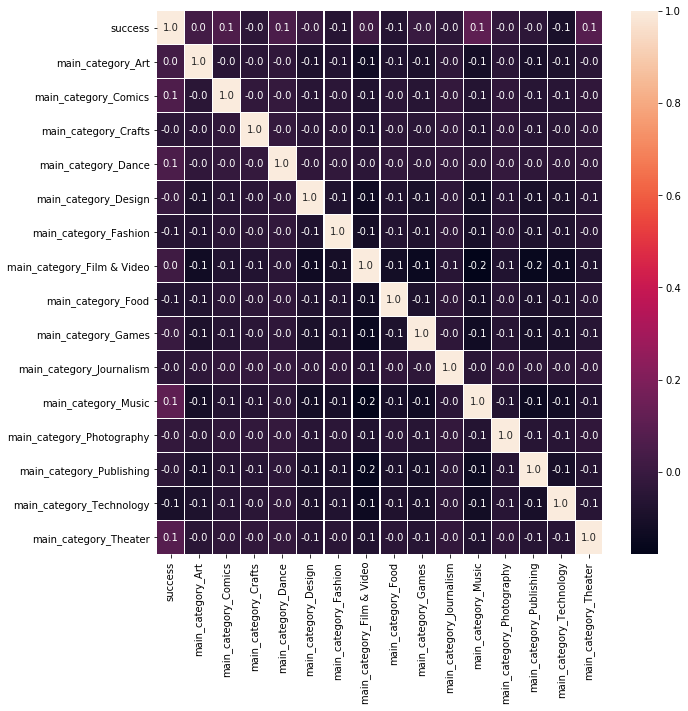

In [62]:
#correlation between sphere of project and success
corr_plot(['success','main_category_Art', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'], (10,10))

**Machine Learning**

We can accurately predict which projects will be successful and which ones won't. We will use a random forest classifier as this ensemble learner is usually quite powerful, and is not distance based (so we dont have to further scale the features like duration or usd_pledged_real or usd_goal_real).


In [44]:
dfEncod["launch_year"]=dfEncod['launch_year'].apply(str)


dfEncod.drop(["days"],axis="columns",inplace=True)

In [45]:
X = dfEncod.iloc[:,dfEncod.columns != 'success']
y = dfEncod["success"]
print("X Columns: ",list(X.columns))
X.head()


X Columns:  ['usd_goal_real', 'launch_year', 'duration', 'main_category_Art', 'main_category_Comics', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'average_pledge']


,usd_goal_real,launch_year,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,average_pledge
0,1533.95,2015,1416.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,30000.00,2017,1440.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,151.312500
2,45000.00,2013,1080.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,55.000000
3,5000.00,2012,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.500000
4,19500.00,2015,1344.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,85.533333


In [50]:
#model library
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

#Classification Libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dfEncod.drop(['success'], axis='columns').values,
                                                    dfEncod.success, 
                                                    test_size=0.2)

In [56]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    log_lm = LogisticRegression()

    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
   ###
    dtree=DecisionTreeClassifier()

    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    
    dtreequestions = importance(dtree)
    ##############################
    rf = RandomForestClassifier(n_estimators=50,random_state=0)

    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    
    accquestions = importance(rf)
    # Reporting
    print("Logistic Regression Report")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")

   
    print("Decision Tree Report")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    
    print("Random Forest Report")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")

In [57]:
def importance(model):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [58]:
ML_training(X,y)


C:\Users\simay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression Report
              precision    recall  f1-score   support

           0       0.70      0.94      0.81     48345
           1       0.74      0.31      0.43     27388

   micro avg       0.71      0.71      0.71     75733
   macro avg       0.72      0.62      0.62     75733
weighted avg       0.72      0.71      0.67     75733

[[45395  2950]
 [19004  8384]]
                      features          Coef
40              average_pledge  1.048870e+00
39                  country_US  3.768475e-03
13         main_category_Music  3.685826e-03
17       main_category_Theater  1.620509e-03
4         main_category_Comics  1.463773e-03
9   main_category_Film & Video  8.143705e-04
11         main_category_Games  7.980739e-04
6          main_category_Dance  5.945389e-04
3            main_category_Art  5.435299e-04
7         main_category_Design  1.020710e-04
32                  country_LU -6.151917e-07
28                  country_HK -2.067892e-06
31                  country_JP

**CONCLUSION**

According to **LOgistic regression model** most top3 important features are average_pledge,country_us,main_categoy.

According to **decision tree model** most top3 important features are average_pledge,usd_goal_real,launch_year.

According to **random forest model** most top3 important features are  average_pledge,usd_goal_real,launch_year.



References:
https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27
https://www.youtube.com/watch?v=s-yT5Is1G1A
https://www.youtube.com/watch?v=vUqC8UPw9SU
https://shirinsplayground.netlify.com/2018/07/explaining_ml_models_code_caret_iml/
https://www.kaggle.com/shivamb/an-insightful-story-of-crowdfunding-projects